# Sensorless Drive Diagnosis Project

#### Purpose of the project
To build a multi-class classification model with numerical attributes

#### About the dataset
Dataset used in the analysis: Sensorless Drive Diagnosis dataset (SDD): 

https://archive.ics.uci.edu/ml/datasets/Dataset+for+Sensorless+Drive+Diagnosis 

The dataset contains information collected from electric current drive signals of a synchronous electric motor. The current signals are measured with a current probe and an oscilloscope on two phases.

After the advances in industrial information technology, condition monitoring methods are becoming increasingly important. The phase currents are used at the evaluation of the process data without additional, cost-intensive sensors and the determination the damage status of a syn-characterize chronomotors and the connected components. 

There are 48 continous predictive features. The target feature contains 11 classes. 


### Setup

In [ ]:
import pandas as pd
import numpy as np

# plot pretty figures
import matplotlib.pyplot as plt
plt.rc('axes', labelsize=14)
plt.rc('xtick', labelsize=12)
plt.rc('ytick', labelsize=12)
import seaborn as sns
sns.set_style('darkgrid', {'axes.facecolor': '0.9'})


from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV, ParameterGrid
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, GradientBoostingClassifier, BaggingClassifier
from sklearn.metrics import recall_score, f1_score, fbeta_score, r2_score, roc_auc_score, roc_curve, auc, cohen_kappa_score
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, precision_score
from sklearn.preprocessing import StandardScaler, MaxAbsScaler, MinMaxScaler
from sklearn.pipeline import Pipeline

In [ ]:
np.random.seed(42)
import sys
import os

### Load Dataset

In [ ]:
df = pd.read_csv("sensorless_drive_diagnosis.txt", delim_whitespace=True, header=None)
header_names = ['feat' + str(i) for i in range(df.shape[1]-1)]
header_names.append('class')
df.set_axis(header_names, axis=1, inplace=True)
display(df.head())
display(df.tail())
display(df.describe())

#### Seperating Target and Features

In [ ]:
X = df.drop(['class'], axis=1)
y = df['class']

### Splitting The Data 

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, shuffle=True, random_state=42)

#### Scaling Training Data

In [ ]:
scaler = StandardScaler()
scaled_x_train = scaler.fit_transform(X_train)
scaled_X_test = scaler.transform(X_test)
scaled_X_train = pd.DataFrame(scaled_x_train, columns=X_train.columns)

### Random Forest Classification Model

### A new Grid Search with updated parameters

In [ ]:
pipe = Pipeline([('classifier', RandomForestClassifier(random_state=123))])
grid = [{'classifier__criterion': ['gini', 'entropy'],
         'classifier__n_estimators':[100, 120, 150, 180, 200],
         'classifier__max_depth': [6, 8, 10, 12, 14],
         'classifier__min_samples_split': [6, 8, 10, 12],
         'classifier__min_samples_leaf': [4, 6, 8, 10]}]
clf = GridSearchCV(estimator=pipe, param_grid=grid,
                   cv=5, n_jobs=-1)
clf.fit(X_train, y_train)
y_pred_train = clf.predict(X_train)
y_pred_test = clf.predict(X_test)

In [ ]:
clf.best_score_

In [ ]:
clf.best_params_

In [1]:
accuracy_score(y_train, y_pred_train)

NameError: name 'accuracy_score' is not defined

In [11]:
round(accuracy_score(y_test, y_pred_test), 6)

0.999145

In [12]:
print(classification_report(y_train, y_pred_train))

              precision    recall  f1-score   support

           1       1.00      1.00      1.00      4245
           2       1.00      1.00      1.00      4230
           3       1.00      1.00      1.00      4275
           4       1.00      1.00      1.00      4271
           5       1.00      1.00      1.00      4253
           6       1.00      1.00      1.00      4262
           7       1.00      1.00      1.00      4216
           8       1.00      1.00      1.00      4290
           9       1.00      1.00      1.00      4307
          10       1.00      1.00      1.00      4247
          11       1.00      1.00      1.00      4211

    accuracy                           1.00     46807
   macro avg       1.00      1.00      1.00     46807
weighted avg       1.00      1.00      1.00     46807



In [13]:
print(classification_report(y_test, y_pred_test))

              precision    recall  f1-score   support

           1       1.00      1.00      1.00      1074
           2       1.00      1.00      1.00      1089
           3       1.00      1.00      1.00      1044
           4       1.00      1.00      1.00      1048
           5       1.00      1.00      1.00      1066
           6       1.00      1.00      1.00      1057
           7       1.00      1.00      1.00      1103
           8       1.00      1.00      1.00      1029
           9       1.00      1.00      1.00      1012
          10       1.00      1.00      1.00      1072
          11       1.00      1.00      1.00      1108

    accuracy                           1.00     11702
   macro avg       1.00      1.00      1.00     11702
weighted avg       1.00      1.00      1.00     11702



In [14]:
print(confusion_matrix(y_train, y_pred_train), '\n')
print(confusion_matrix(y_test, y_pred_test), '\n')

[[4245    0    0    0    0    0    0    0    0    0    0]
 [   0 4230    0    0    0    0    0    0    0    0    0]
 [   0    0 4275    0    0    0    0    0    0    0    0]
 [   0    0    0 4271    0    0    0    0    0    0    0]
 [   0    0    0    0 4253    0    0    0    0    0    0]
 [   0    0    0    0    0 4262    0    0    0    0    0]
 [   0    0    0    0    0    0 4216    0    0    0    0]
 [   0    0    0    0    0    0    0 4290    0    0    0]
 [   0    0    0    0    0    0    0    0 4307    0    0]
 [   0    0    0    0    0    0    0    0    0 4247    0]
 [   0    0    0    0    0    0    0    0    0    0 4211]] 

[[1073    0    0    0    0    1    0    0    0    0    0]
 [   0 1088    0    0    0    0    0    0    1    0    0]
 [   0    0 1044    0    0    0    0    0    0    0    0]
 [   0    0    0 1048    0    0    0    0    0    0    0]
 [   0    0    3    0 1062    0    0    1    0    0    0]
 [   0    0    0    0    0 1057    0    0    0    0    0]
 [   0    0

In [23]:
def plot_feature_importances(model):
    n_features = X_train.shape[1]
    plt.figure(figsize=(20, 15))
    plt.barh(range(n_features), model.feature_importances_, align='center')
    plt.yticks(np.arange(n_features), X_train.columns.values)
    plt.title('Compariosn of Feature Importances')
    plt.xlabel('Feature importance')
    plt.ylabel('Feature')

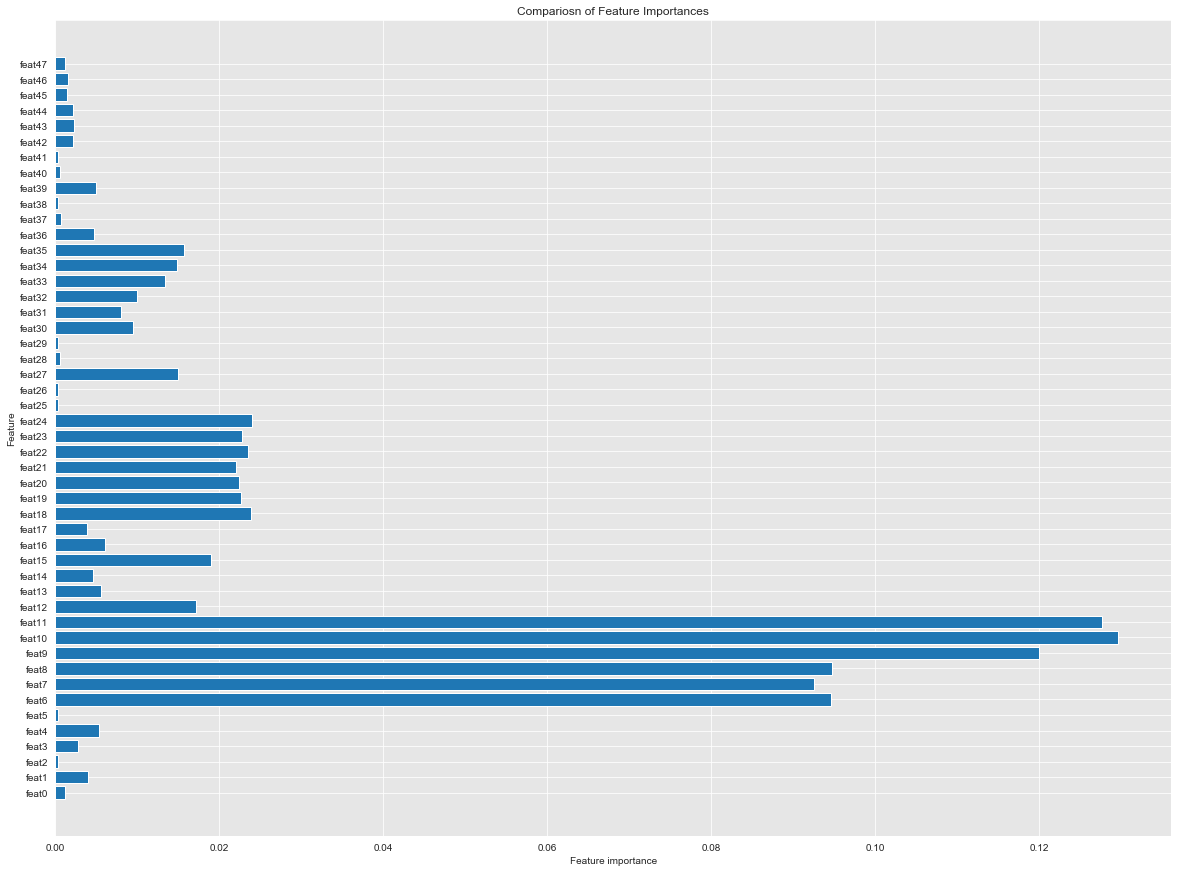

In [24]:
plot_feature_importances(clf)

In [ ]:
training_accuracy = accuracy_score(y_train, y_pred_train)
val_accuracy = accuracy_score(y_test, y_pred_test)

print("Training Accuracy: {:.4}%".format(training_accuracy * 100))
print("Validation accuracy: {:.4}%".format(val_accuracy * 100))

In [ ]:
cross_val_score(adaboost_clf, df, target, cv=5).mean()